In [ ]:
import numpy as np
from shpm2 import SHPM
from evo import evo_alg
import matplotlib.pyplot as plt
import random

from copy import deepcopy
from plotutils import plot_matrix_grid, plot_matrix_spectra

In [3]:
random.seed(42)

In [4]:
n = 10
m = 3 # parents
l = 50 # population size
max_iters = 800

In [5]:
shpm = SHPM(n,
    Q_sep = 0.3,
    UT_sep = 0.3,
    HD_sep = 0.5
)

In [6]:
# generate a random target matrix 
P_target = shpm.random_point()
A_target = shpm.assemble(P_target)
A_target_norm = np.linalg.norm(A_target)
H_target = shpm.hberg.assemble(P_target[1])
Q_target = P_target[0]

In [7]:
def objective(p):
    A = shpm.assemble(p)    
    A_norm = np.linalg.norm(A)

    distance = np.linalg.norm(A - A_target) / A_target_norm
    return distance

In [8]:
# create initial population:
p = [shpm.random_point() for i in range(l)]
# p = [shpm.mutate(deepcopy(P_target), mag=1.0) for i in range(l)]
# p = [shpm.mutate(deepcopy(best), mag=1.0) for i in range(l)]

In [9]:
# run the evolutionary algorithm:
best, best_fitness, iters_taken, population_objectives, n_sames = evo_alg(
    p, m, l, objective, shpm.mutate, shpm.crossover, shpm.same_species, s=0.02, maxiter=max_iters
)

In [10]:
q = 0.2
bests = np.array([l[0] for l in population_objectives])
fitness_stds = np.array([np.std(l) for l in population_objectives])
avgs = np.array([np.average(l) for l in population_objectives])
fitness_quantile = np.array([np.quantile(l, q) for l in population_objectives])

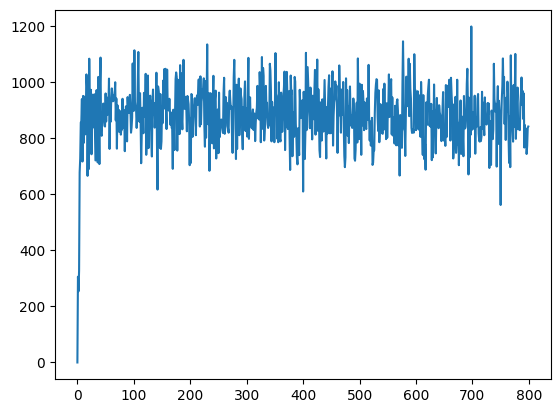

In [11]:
plt.plot(n_sames)
plt.show()

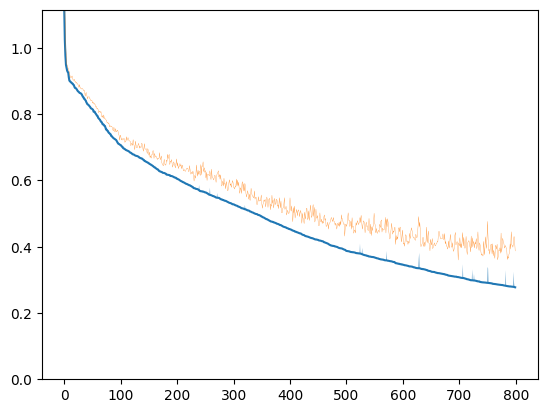

In [12]:
plt.plot(bests)
plt.plot(avgs, linewidth=0.2)
# plt.plot(fitness_quantile)
plt.fill_between(np.arange(len(bests)), bests, fitness_quantile, alpha=0.5)
# plt.ylim((0.0, np.max([np.max(bests), np.max(avgs)])))
plt.ylim((0.0, np.max(bests)))
plt.show()

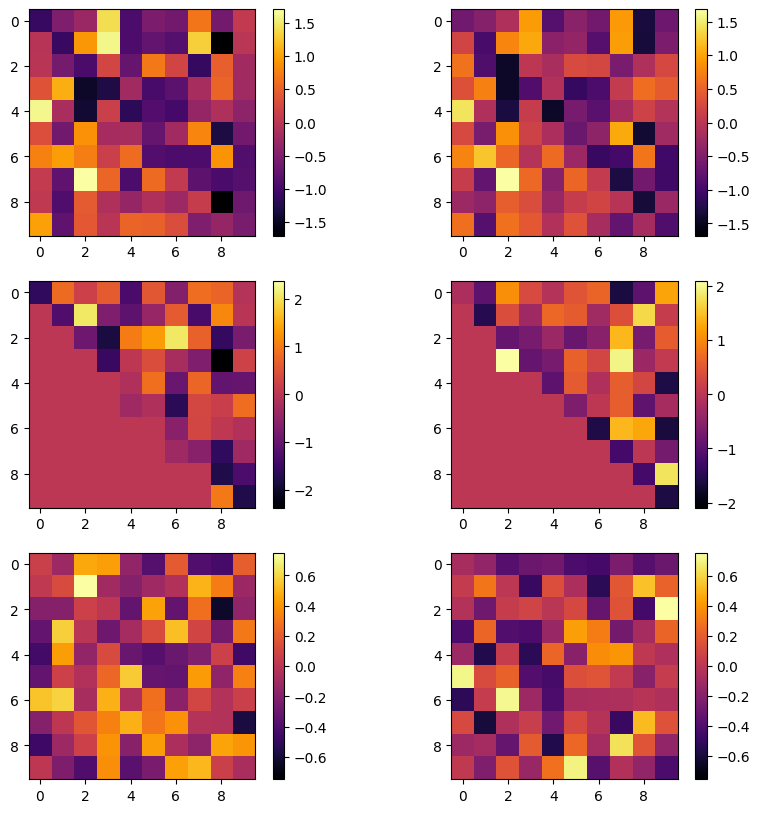

In [13]:
plot_matrix_grid(
    [
        [A_target, shpm.assemble(best)],  
        [H_target, shpm.hberg.assemble(best[1])], 
        [Q_target, best[0]]
    ]
)

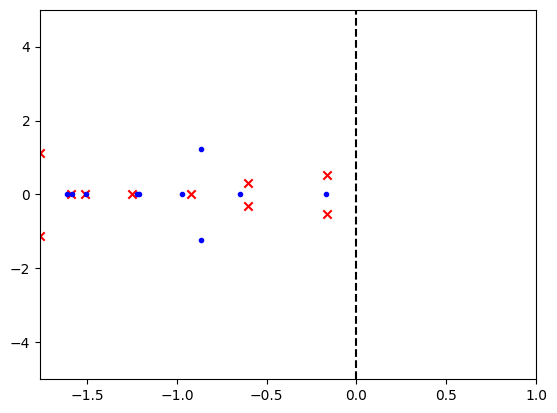

In [14]:
plot_matrix_spectra(A_target, shpm.assemble(best))

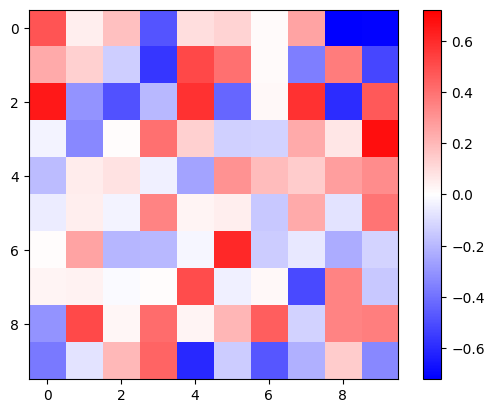

In [15]:
plt.imshow(shpm.assemble(best) - A_target, cmap="bwr", norm=CenteredNorm())
plt.colorbar()